# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in preciction 

In [13]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
from sklearn import metrics
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)


[0.96666667 1.         0.86666667 0.86666667 1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [14]:
from sklearn import neighbors
n_neighbors = 11
clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)
# shows the model predictions  
for i in range(len(iris.target)):
    print(iris.data[i,:])
    print(iris.data[i,:].reshape(1,-1))
    instance=iris.data[i,:].reshape(1,-1)
    #print(clf_knn.predict(instance))
    predicted=clf_knn.predict(instance)[0]
    print(predicted)
    if iris.target[i]==predicted:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))

[0.93333333 1.         1.         0.96666667 1.        ]
[5.1 3.5 1.4 0.2]
[[5.1 3.5 1.4 0.2]]
0
0 ok setosa
[4.9 3.  1.4 0.2]
[[4.9 3.  1.4 0.2]]
0
1 ok setosa
[4.7 3.2 1.3 0.2]
[[4.7 3.2 1.3 0.2]]
0
2 ok setosa
[4.6 3.1 1.5 0.2]
[[4.6 3.1 1.5 0.2]]
0
3 ok setosa
[5.  3.6 1.4 0.2]
[[5.  3.6 1.4 0.2]]
0
4 ok setosa
[5.4 3.9 1.7 0.4]
[[5.4 3.9 1.7 0.4]]
0
5 ok setosa
[4.6 3.4 1.4 0.3]
[[4.6 3.4 1.4 0.3]]
0
6 ok setosa
[5.  3.4 1.5 0.2]
[[5.  3.4 1.5 0.2]]
0
7 ok setosa
[4.4 2.9 1.4 0.2]
[[4.4 2.9 1.4 0.2]]
0
8 ok setosa
[4.9 3.1 1.5 0.1]
[[4.9 3.1 1.5 0.1]]
0
9 ok setosa
[5.4 3.7 1.5 0.2]
[[5.4 3.7 1.5 0.2]]
0
10 ok setosa
[4.8 3.4 1.6 0.2]
[[4.8 3.4 1.6 0.2]]
0
11 ok setosa
[4.8 3.  1.4 0.1]
[[4.8 3.  1.4 0.1]]
0
12 ok setosa
[4.3 3.  1.1 0.1]
[[4.3 3.  1.1 0.1]]
0
13 ok setosa
[5.8 4.  1.2 0.2]
[[5.8 4.  1.2 0.2]]
0
14 ok setosa
[5.7 4.4 1.5 0.4]
[[5.7 4.4 1.5 0.4]]
0
15 ok setosa
[5.4 3.9 1.3 0.4]
[[5.4 3.9 1.3 0.4]]
0
16 ok setosa
[5.1 3.5 1.4 0.3]
[[5.1 3.5 1.4 0.3]]
0
17 ok setosa

In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [15]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted]))
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicolor
68 ok versicolor
69 ok versicolor
70 ok versicolor
71 

The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

C:\Users\andre\AppData\Local\Temp\ipykernel_15032\469533143.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies


k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.9166666666666666
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9166666666666666
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9333333333333333
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.9666666666666667
k neighbors=13
accuracy=0.9666666666666667
k neighbors=14
accuracy=0.95
k neighbors=15
accuracy=0.95
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9166666666666666
k neighbors=19
accuracy=0.9166666666666666
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9166666666666666
k neighbors=22
accuracy=0.9166666666666666
k neighbors=23
accuracy=0.9166666666666666
k neighbors=24
accuracy=0.9
k neighbors=25
accuracy=0.91666666

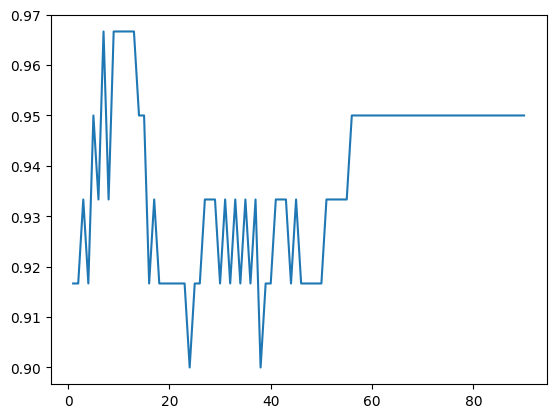

In [16]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy=0
best_k=1
A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
for n_neighbors in np.arange(1,len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    clf_knn3.fit(X_train, y_train)
    index=n_neighbors-1
    A[index]=clf_knn3.score(X_test, y_test)
    if best_accuracy<clf_knn3.score(X_test, y_test):
        best_accuracy=clf_knn3.score(X_test, y_test)
        best_k=n_neighbors
    print("k neighbors="+str(n_neighbors))
    print("accuracy="+str(clf_knn3.score(X_test, y_test)))
    
print("\n")
print("best k="+str(best_k))
print("best accuracy="+str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333


C:\Users\andre\AppData\Local\Temp\ipykernel_15032\1847188148.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies


k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k neighbors=26
accuracy=0.8833333333333333
k neighbors=27
accuracy=0.9
k neighbors=28
accuracy=0.8833333333333333
k neighbors=29
accuracy=0.9
k neighbors=30
accuracy=0.8666666666666667
k neighbors=31
accuracy=0.9
k neighbors=32
accuracy=0.8666666666666667
k neighbors=33
accuracy=0.8833333333333333
k neighbors=34
accuracy=0.8666666666666667
k neighbors=35
accuracy=0.8833333333333333
k neighbors=36
accuracy=0.8666666666666667
k neighbors=37
accuracy=0.8833333333333333
k neighbors=38
accuracy=0.8666666666666667
k neighbors=39
accuracy=0.8666666666666667
k neighbors=40
accuracy=0.8666666666666667
k neighbors=41
accuracy=0.8333333333333334
k neighbors=42
accuracy=0.8166666666666667
k neighbors=43
accuracy=0.8166666666666667


C:\Users\andre\AppData\Local\Temp\ipykernel_15032\1847188148.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies


k neighbors=13
accuracy=0.9666666666666667
k neighbors=14
accuracy=0.95
k neighbors=15
accuracy=0.95
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9166666666666666
k neighbors=19
accuracy=0.9166666666666666
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9166666666666666
k neighbors=22
accuracy=0.9166666666666666
k neighbors=23
accuracy=0.9166666666666666
k neighbors=24
accuracy=0.9
k neighbors=25
accuracy=0.9166666666666666
k neighbors=26
accuracy=0.9166666666666666
k neighbors=27
accuracy=0.9333333333333333
k neighbors=28
accuracy=0.9333333333333333
k neighbors=29
accuracy=0.9333333333333333
k neighbors=30
accuracy=0.9166666666666666
k neighbors=31
accuracy=0.9333333333333333
k neighbors=32
accuracy=0.9166666666666666
k neighbors=33
accuracy=0.9333333333333333
k neighbors=34
accuracy=0.9166666666666666
k neighbors=35
accuracy=0.9333333333333333
k neighbors=36
accuracy=0.9166666666666666
k neighbors

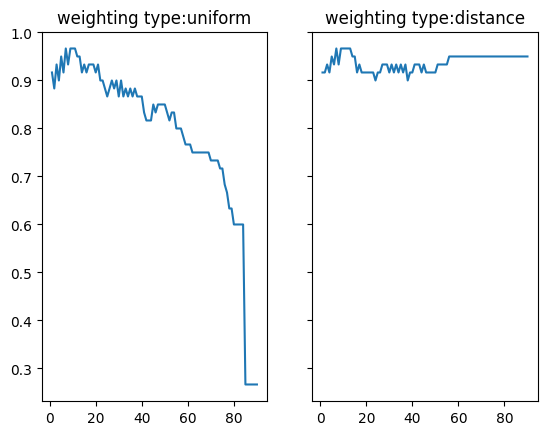

In [17]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i=0  #parameter in the control of the subplot to draw on'
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True)
for weight_type in ['uniform','distance']:
    print("weighting:"+str(weight_type))
    A=np.zeros(len(y_train), dtype=np.float) # for storing accuracies
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1
        A[index]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    if i==0:
        ax1.plot(np.arange(1,len(y_train)+1),A)
        ax1.set_title('weighting type:'+str(weight_type))
    else:
        ax2.plot(np.arange(1,len(y_train)+1),A)
        ax2.set_title('weighting type:'+str(weight_type))
    i=i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

C:\Users\andre\AppData\Local\Temp\ipykernel_15032\1612611206.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing



 weighting:uniform
k neighbors=1
accuracy=0.9166666666666666
k neighbors=2
accuracy=0.8833333333333333
k neighbors=3
accuracy=0.9333333333333333
k neighbors=4
accuracy=0.9
k neighbors=5
accuracy=0.95
k neighbors=6
accuracy=0.9166666666666666
k neighbors=7
accuracy=0.9666666666666667
k neighbors=8
accuracy=0.9333333333333333
k neighbors=9
accuracy=0.9666666666666667
k neighbors=10
accuracy=0.9666666666666667
k neighbors=11
accuracy=0.9666666666666667
k neighbors=12
accuracy=0.95
k neighbors=13
accuracy=0.95
k neighbors=14
accuracy=0.9166666666666666
k neighbors=15
accuracy=0.9333333333333333
k neighbors=16
accuracy=0.9166666666666666
k neighbors=17
accuracy=0.9333333333333333
k neighbors=18
accuracy=0.9333333333333333
k neighbors=19
accuracy=0.9333333333333333
k neighbors=20
accuracy=0.9166666666666666
k neighbors=21
accuracy=0.9333333333333333
k neighbors=22
accuracy=0.9
k neighbors=23
accuracy=0.9
k neighbors=24
accuracy=0.8833333333333333
k neighbors=25
accuracy=0.8666666666666667
k

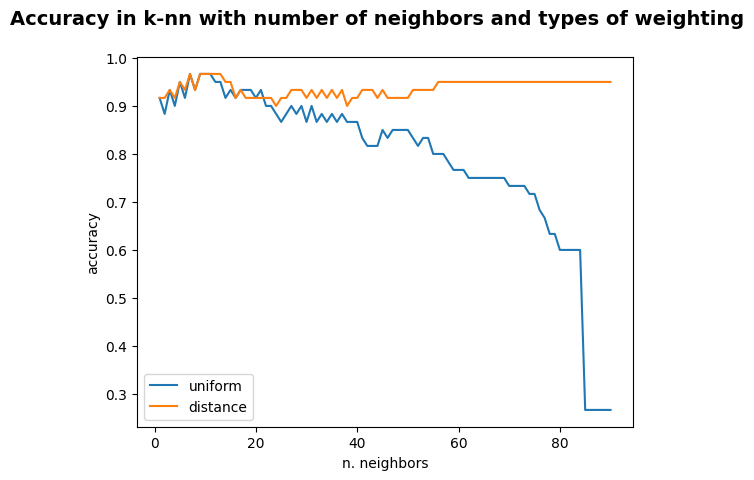

In [18]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A=np.zeros((len(y_train),2), dtype=np.float) # 2 arrays for storing accuracies for each type of weigthing
i=0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy=0
for weight_type in ['uniform','distance']:
    print("\n weighting:"+str(weight_type))
    best_accuracy=0
    best_k=1
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index=n_neighbors-1 # computes the matrix row index
        A[index,i]=clf_knn2.score(X_test, y_test)
        if best_accuracy<clf_knn2.score(X_test, y_test):
            best_accuracy=clf_knn2.score(X_test, y_test)
            best_k=n_neighbors
        print("k neighbors="+str(n_neighbors))
        print("accuracy="+str(clf_knn2.score(X_test, y_test)))
    
    print("\n")
    print("best k="+str(best_k))
    print("best accuracy="+str(best_accuracy))
    plt.plot(np.arange(1,len(y_train)+1),A[:,i])
    i=i+1
plt.legend(['uniform', 'distance'], loc='lower left')  
plt.show()


## What you have to do: 
0: Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica.


Text(0, 0.5, 'Petal width')

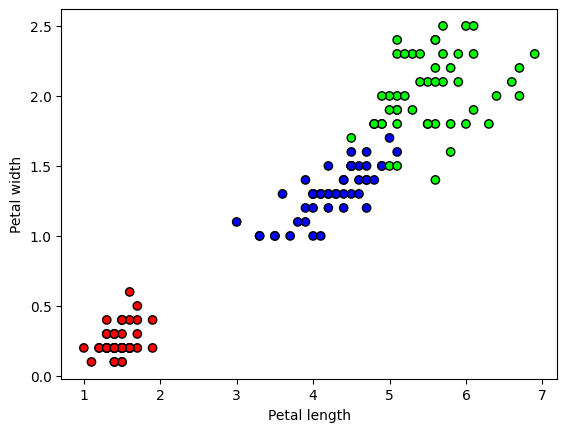

In [19]:
'''
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
'''
colors = ["#FF0000", "#0000FF", "#00FF00"]
my_cmap = ListedColormap(colors, name="my_cmap")

X = iris.data[:, 2:]
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=my_cmap, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")


1. Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation


Text(0, 0.5, 'Petal width')

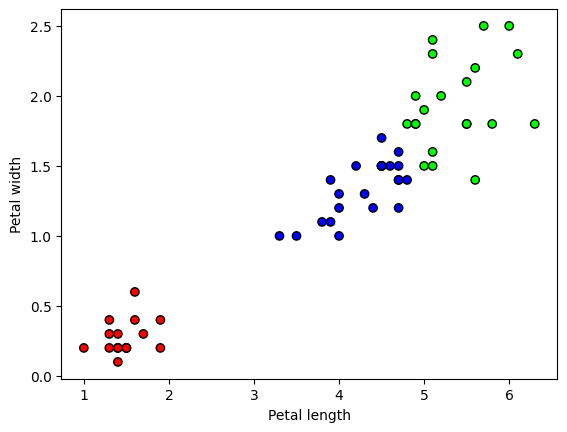

In [20]:
clf_knn = neighbors.KNeighborsClassifier(7, weights="distance")
clf_knn.fit(X_train, y_train)
predicted_y = clf_knn.predict(X_test)

plt.scatter(X_test[:, 2], X_test[:, 3], c=predicted_y, cmap=my_cmap, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width")

2. Plot the ROC plot of the k-nn (for the best value of k) for each of the three classes: setosa, virginica and versicolor

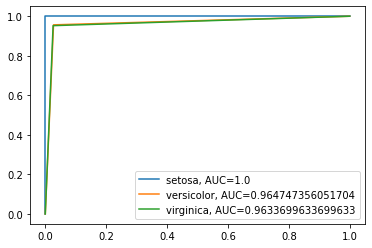

In [111]:
plt.figure(0).clf()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
classifier = OneVsRestClassifier(neighbors.KNeighborsClassifier(7, weights="distance"))
classifier.fit(X_train, y_train)
predicted_y = classifier.predict(X_test)
for i in range(3):
	fpr, tpr, thresholds = metrics.roc_curve(y_test[:, i], predicted_y[:, i])
	roc_auc = metrics.auc(fpr, tpr)
	plt.plot(fpr,tpr,label=f"{iris.target_names[i]}, AUC={str(roc_auc)}")
	plt.legend()


3. Plot the ROC plot for the best decision tree you trained in Exercize n.1  


In [22]:
clf_weights = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:10})

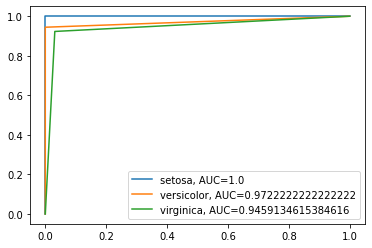

In [110]:
plt.figure(0).clf()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
classifier = OneVsRestClassifier(clf_weights)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
classifier = classifier.fit(X_train, y_train)
predicted_y = classifier.predict(X_test)
for i in range(3):
	fpr, tpr, thresholds = metrics.roc_curve(y_test[:, i], predicted_y[:, i])
	roc_auc = metrics.auc(fpr, tpr)
	plt.plot(fpr,tpr,label=f"{iris.target_names[i]}, AUC={str(roc_auc)}")
	plt.legend()


4. Compare decision trees and k-nn on the ROC space: for which values of (TPR,FPR) k-nn is better than decision trees?

TypeError: __init__() got an unexpected keyword argument 'distance'

<Figure size 432x288 with 0 Axes>

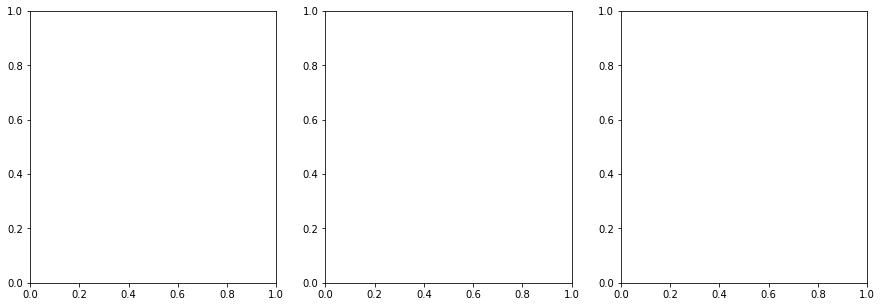

In [113]:
plt.figure(0).clf()
fig2, axs = plt.subplots(1, 3, figsize=(15, 5))
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
classifier_1 = OneVsRestClassifier(clf_weights)
classifier_2 = OneVsRestClassifier(neighbors.KNeighborsClassifier(7))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
classifier_1 = classifier_1.fit(X_train, y_train)
classifier_2 = classifier_2.fit(X_train, y_train)

for i in range(3):
    predicted_y_1 = classifier_1.predict(X_test)
    predicted_y_2 = classifier_2.predict(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test[:, i], predicted_y_1[:, i])
    roc_auc = metrics.auc(fpr, tpr)
    axs[i].plot(fpr, tpr, color="green", label=f"Decision tree: {str(roc_auc)}")
    fpr, tpr, thresholds = metrics.roc_curve(y_test[:, i], predicted_y_2[:, i])
    roc_auc = metrics.auc(fpr, tpr)
    axs[i].plot(fpr, tpr, color="red", label=f"KNN: {str(roc_auc)}")
    axs[i].set_title(f'ROC curve {iris.target_names[i]}')
    axs[i].legend()

for ax in axs.flat:
    ax.set(xlabel='fpr', ylabel='tpr')

for ax in axs.flat:
    ax.label_outer()

5. In the following, extend the above exercize on k-nn using a kernel function  K(x,y) for the distances computation, such that distance(x,y)=1-K(x,y).    Use a Gaussian-like (or Radial Basis Function) kernel K(x,y)=exp(-gamma(x-y)^2), with gamma the inverse of the sigma squared variance, that must be tuned to the best value according to the accuracy reached by the k-nn, with k=7 (similarly as done with the previous example on tuning the parameter n_neightbors).

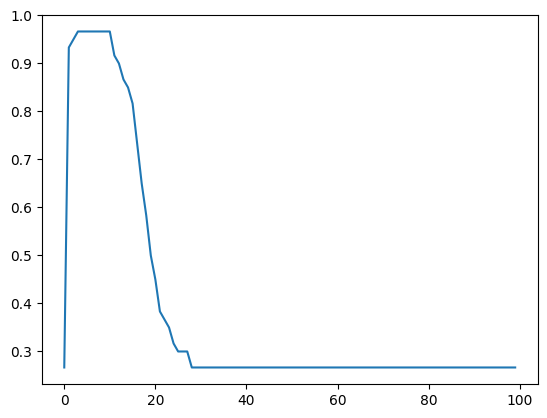

Best accuracy: 0.9666666666666667, for sigma: 3


In [24]:
from numpy.linalg import norm
import numpy as np

def radial_basis_function(vector_1, vector_2, sigma):
	return np.exp(-(norm(vector_1-vector_2, ord=2)**2)/2*(sigma**2))	

def distance(x, y, **kwargs):
	sigma = kwargs["sigma"]
	return 1 - radial_basis_function(x, y, sigma)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

accuracies = []
best_accuracy = 0
best_sigma = 0
for sigma in np.arange(0,100):
	clf_knn_rbf = neighbors.KNeighborsClassifier(7, weights="distance", metric=distance, metric_params={"sigma": sigma})
	clf_knn_rbf.fit(X_train, y_train)
	accuracy_rbf = clf_knn_rbf.score(X_test, y_test)
	accuracies.append(accuracy_rbf)
	if accuracy_rbf > best_accuracy:
		best_accuracy = accuracy_rbf
		best_sigma = sigma
	

plt.plot(np.arange(0, 100), accuracies)
plt.show()
print(f"Best accuracy: {best_accuracy}, for sigma: {best_sigma}")

